## Exploring data - zadanie 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt("136737-imbalanced.txt", skip_header=1)
attributes = len(data[0])

print("suma odchyleń", sum([a for a in data[:, len(data[0]) - 1]]))
print("attributes:", attributes, "data:", len(data))

suma odchyleń 294.0
attributes: 78 data: 10000


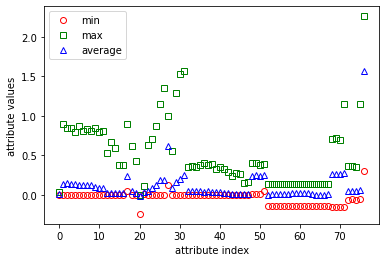

1.561394671
2.2587


In [ ]:
min_attributes = np.zeros(attributes)
max_attributes = np.zeros(attributes)
average = np.zeros(attributes)
std = np.zeros(attributes)

for index in range(0, attributes):
  min_attributes[index] = np.min(data[:, index])
  max_attributes[index] = np.max(data[:, index])
  average[index] = np.mean(data[:, index])
  std[index] = np.std(data[:, index])

# plt.plot(np.arange(0., attributes), min_attributes[:attributes], 'ro', fillstyle="none")
# plt.plot(np.arange(0., attributes), max_attributes[:attributes], 'gs', fillstyle="none")
plt.plot(np.arange(0., attributes - 1), min_attributes[:attributes - 1], 'ro', fillstyle="none")
plt.plot(np.arange(0., attributes - 1), max_attributes[:attributes - 1], 'gs', fillstyle="none")
plt.plot(np.arange(0., attributes - 1), average[:attributes - 1], 'b^', fillstyle="none")
plt.ylabel('attribute values')
plt.xlabel('attribute index')
plt.legend(['min', 'max', 'average']) # 'min value', max_value, std
plt.show()

print(average[attributes - 2])
print(max_attributes[attributes - 2])

Klasyfikator Zero Rule - trafność i G-mean

In [ ]:
from scipy.stats import gmean

print("trafność:", (len(data) - sum([a for a in data[:, len(data[0]) - 1]])) / len(data) * 100, "%")
print("gmean:", gmean(data[:,-1] == np.array([0 for _ in data[:, len(data[0]) - 1]])))

trafność: 97.06 %
gmean: 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


## Zadanie 2

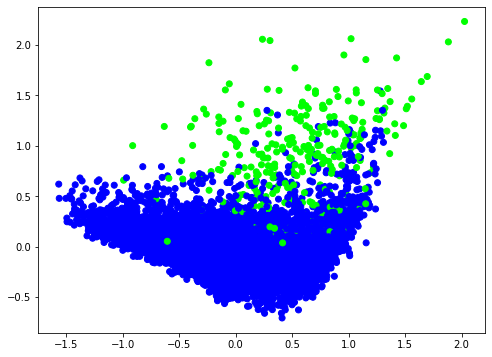

zachowana wariancja (%): 49.08829572583587
[52.8484507  27.98716013]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data[:,:-1], data[:,-1])

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

X = pca.transform(data[:,:-1])
plt.scatter(X[:, 0], X[:, 1], c= data[:,-1], cmap="brg", facecolor="gold")

plt.show()

print('zachowana wariancja (%):', sum(pca.explained_variance_ratio_) * 100)
print(pca.singular_values_)

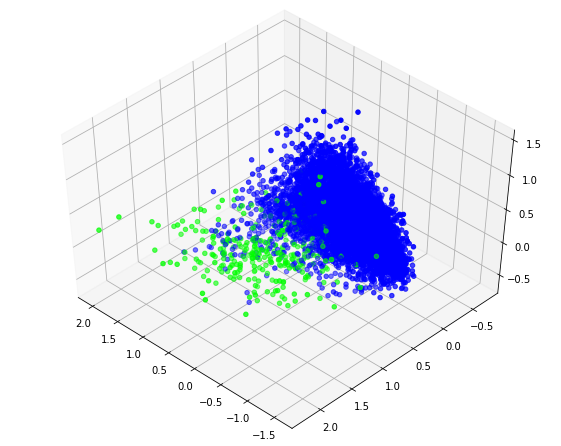

zachowana wariancja (%): 58.52021854618913
[52.8484507  27.98716013 26.21346687]


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(data[:,:-1], data[:,-1])

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

X = pca.transform(data[:,:-1])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= data[:,-1], cmap="brg", facecolor="gold")

plt.show()

print('zachowana wariancja (%):', sum(pca.explained_variance_ratio_) * 100)
print(pca.singular_values_)

## Zadanie 4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score
from sklearn.model_selection import cross_validate
from imblearn.metrics import geometric_mean_score

X, y = data[:,:-1], data[:,-1]

scoring = {'score': make_scorer(accuracy_score), 
           'gmean': make_scorer(geometric_mean_score), 
           'roc_auc_score': make_scorer(roc_auc_score)
           }

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

### ZeroR 

In [ ]:
from sklearn.utils.multiclass import unique_labels

predict = np.array([0 for _ in data[:, len(data[0]) - 1]], dtype=float)

print("score:", (len(data) - sum([a for a in data[:, len(data[0]) - 1]])) / len(data) * 100, "%")
print("gmean:", geometric_mean_score(data[:,-1], predict)) # spowodowane nierozpoznaniem klasy zakłóceń
print("ROC AUC:", roc_auc_score(data[:,-1], predict))

score: 97.06 %
gmean: 0.0
ROC AUC: 0.5


### Metoda KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X, y)

cv_results = cross_validate(neigh, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

Score: 0.993
Gmean: 0.8755950357709131
ROC AUC: 0.8833333333333333


### Metoda DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

cv_results = cross_validate(tree, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

Score: 0.989
Gmean: 0.892118987949362
ROC AUC: 0.8974226804123712


### Metoda RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X, y)

cv_results = cross_validate(forest, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

Score: 0.996
Gmean: 0.9309493362512627
ROC AUC: 0.9333333333333333


### Metoda SVC

In [ ]:
svc = SVC()
svc.fit(X, y)

cv_results = cross_validate(svc, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

Score: 0.995
Gmean: 0.9128709291752769
ROC AUC: 0.9166666666666667


### Metoda MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(X, y)

cv_results = cross_validate(mlp, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score: 0.992
Gmean: 0.9630992355188767
ROC AUC: 0.963573883161512


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Metoda GaussianNB

In [ ]:
gauss = GaussianNB()
gauss.fit(X, y)

cv_results = cross_validate(gauss, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

Score: 0.937
Gmean: 0.9332719665638111
ROC AUC: 0.9338487972508592


### Metoda QuadraticDiscriminantAnalysis

In [ ]:
quadratic = QuadraticDiscriminantAnalysis()
quadratic.fit(X, y)

cv_results = cross_validate(quadratic, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

Score: 0.983
Gmean: 0.9744781092957625
ROC AUC: 0.9745196917504174


### Metoda imbalanced-learn

In [ ]:
!pip install -U imbalanced-learn  # żeby nie było starej wersji i na pewno weszły importy

from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.over_sampling import SVMSMOTE, KMeansSMOTE
from imblearn.pipeline import Pipeline

X, y = data[:,:-1], data[:,-1]
# ------------------- BALANCED BAGGING -------------------
bbc = BalancedBaggingClassifier(random_state=10)
bbc.fit(X, y)
 
cv_results = cross_validate(bbc, X, y, cv=10, scoring=scoring)
print("\nBalancedBagging")
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))


# ------------------- BALANCED RANDOM FOREST ------------------- 
clf = BalancedRandomForestClassifier(max_depth=20, random_state=10)
clf.fit(X, y)

cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
print("\nBalancedRandomForest")
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))


# ------------------- SVM SMOTE ------------------- 
# sm = SVMSMOTE(random_state=10)
# sm.fit_resample(X, y)

steps = [('over', SVMSMOTE(random_state=10)), ('model', SVC())]
pipeline = Pipeline(steps=steps)

cv_results = cross_validate(pipeline, X, y, cv=10, scoring=scoring)
print("\nSVMSMOTE")
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))


# ------------------- KMEANS SMOTE ------------------- 
# sm = KMeansSMOTE(random_state=10)
# sm.fit_resample(X, y)

steps = [('over', KMeansSMOTE(random_state=10)), ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)

cv_results = cross_validate(pipeline, X, y, cv=10, scoring=scoring)
print("\nKMeansSMOTE")
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)

BalancedBagging
Score: 0.976
Gmean: 0.9678686684928756
ROC AUC: 0.9678694158075601

BalancedRandomForest
Score: 0.963
Gmean: 0.9786600478135428
ROC AUC: 0.9788877445932028

SVMSMOTE
Score: 0.984
Gmean: 0.991726848543249
ROC AUC: 0.9917610710607622

KMeansSMOTE
Score: 0.992
Gmean: 0.9599198269018799
ROC AUC: 0.9603679107922866


## Zadanie 5

In [ ]:
def construct_classifier(clf, scalar, X, y):
  pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])
  measures = []
  measures_normalized = []

  cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
  cv_results_normalized = cross_validate(pipeline, X, y, cv=10, scoring=scoring)

  measures.append(max(cv_results['test_score']))
  measures.append(max(cv_results['test_gmean']))
  measures.append(max(cv_results['test_roc_auc_score']))

  measures_normalized.append(max(cv_results_normalized['test_score']))
  measures_normalized.append(max(cv_results_normalized['test_gmean']))
  measures_normalized.append(max(cv_results_normalized['test_roc_auc_score']))

  return measures, measures_normalized

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

original = []
normalized = []


X, y = data[:,:-1], data[:,-1]

labels = ['KNeighborsClassifier', 'DecisionTreeClassifier', 
          'RandomForestClassifier', 'SVC', 'MLPClassifier', 'GaussianNB', 
          'QuadraticDiscriminantAnalysis', 'BalancedBagging', 'BalancedRandomForest',
          'SVMSMOTE', 'KMeansSMOTE']

# KNeighborsClassifier
clf = KNeighborsClassifier()

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized KNeighborsClassifier')

# DecisionTreeClassifier
clf = DecisionTreeClassifier()

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized DecisionTreeClassifier')

# RandomForestClassifier
clf = RandomForestClassifier()

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized RandomForestClassifier')

# SVC
clf = SVC()

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized SVC')

# MLPClassifier
clf = MLPClassifier()

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized MLPClassifier')

# GaussianNB
clf = GaussianNB()

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized GaussianNB')

# QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized QuadraticDiscriminantAnalysis')

# BalancedBagging
clf = BalancedBaggingClassifier(random_state=10)

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized BalancedBagging')

# BalancedRandomForest
clf = BalancedRandomForestClassifier(max_depth=20, random_state=10)

ori, norm = construct_classifier(clf, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized BalancedRandomForest')

# SVMSMOTE 
steps = [('over', SVMSMOTE(random_state=10)), ('model', SVC())]
pipeline = Pipeline(steps=steps)

ori, norm = construct_classifier(pipeline, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized SVMSMOTE')

# KMeansSMOTE
steps = [('over', KMeansSMOTE(random_state=10)), ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)

ori, norm = construct_classifier(pipeline, scalar, X, y)
original.append(ori)
normalized.append(norm)
print('finalized KMeansSMOTE')

finalized KNeighborsClassifier
finalized DecisionTreeClassifier
finalized RandomForestClassifier
finalized SVC


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


finalized MLPClassifier
finalized GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

finalized QuadraticDiscriminantAnalysis
finalized BalancedBagging
finalized BalancedRandomForest
finalized SVMSMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/p

finalized KMeansSMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/p

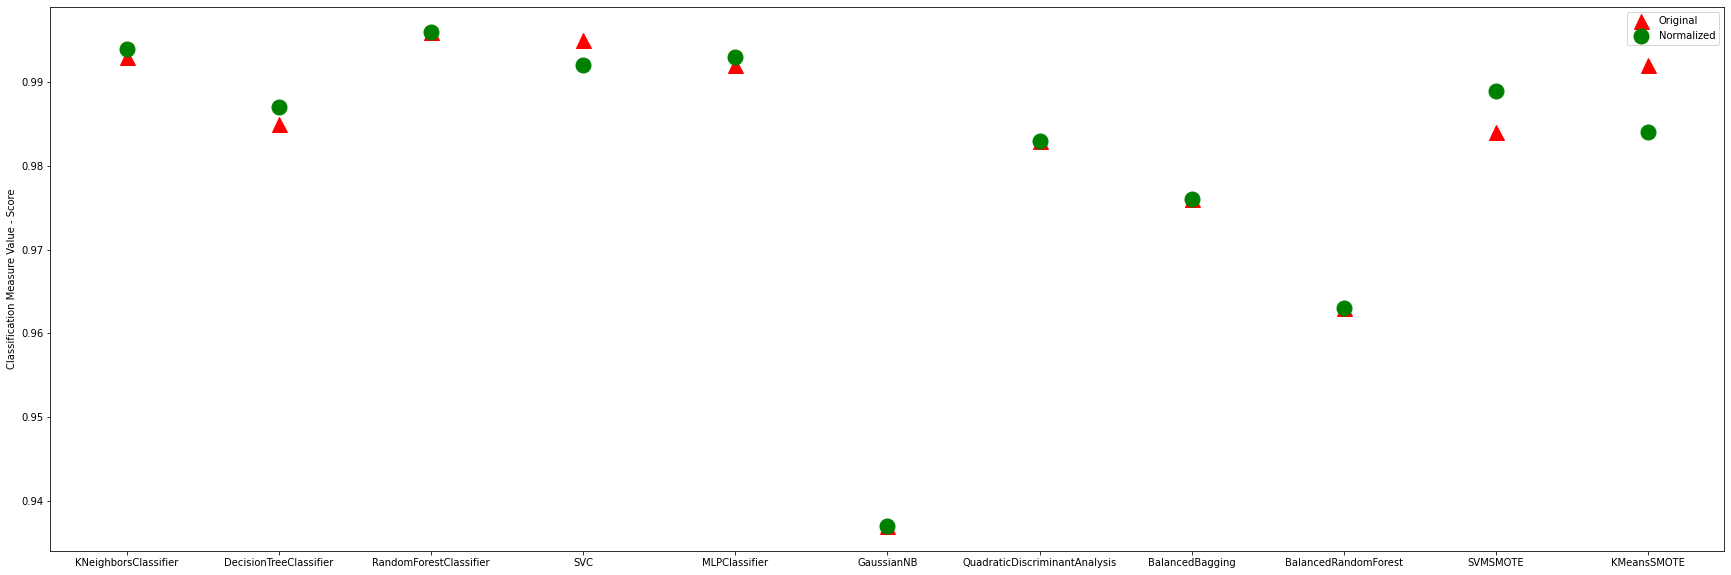

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.plot(labels, np.array(original)[:,0], 'r^', labels, np.array(normalized)[:,0], 'go',markersize=15)
plt.ylabel('Classification Measure Value - Score')
plt.legend(['Original', 'Normalized'])
plt.show()

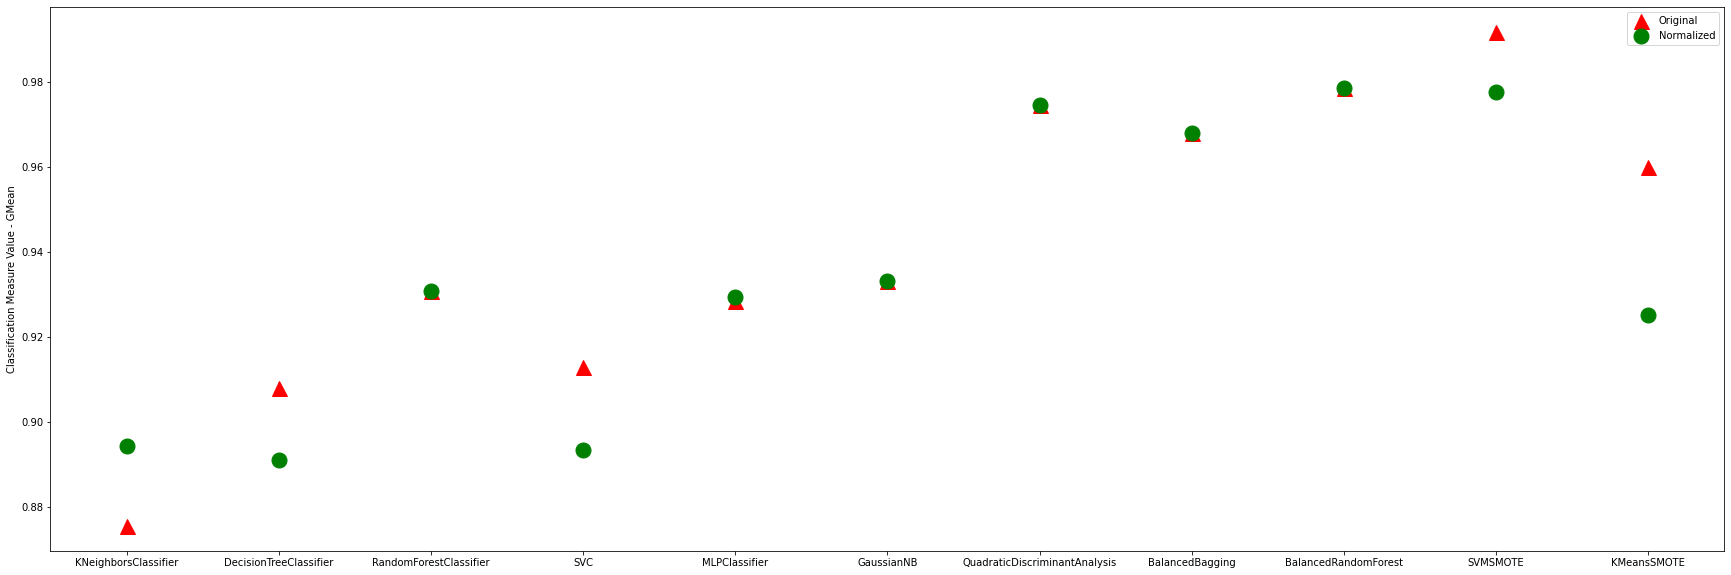

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(labels, np.array(original)[:,1], 'r^', labels, np.array(normalized)[:,1], 'go',markersize=15)
plt.ylabel('Classification Measure Value - GMean')
plt.legend(['Original', 'Normalized'])
plt.show()

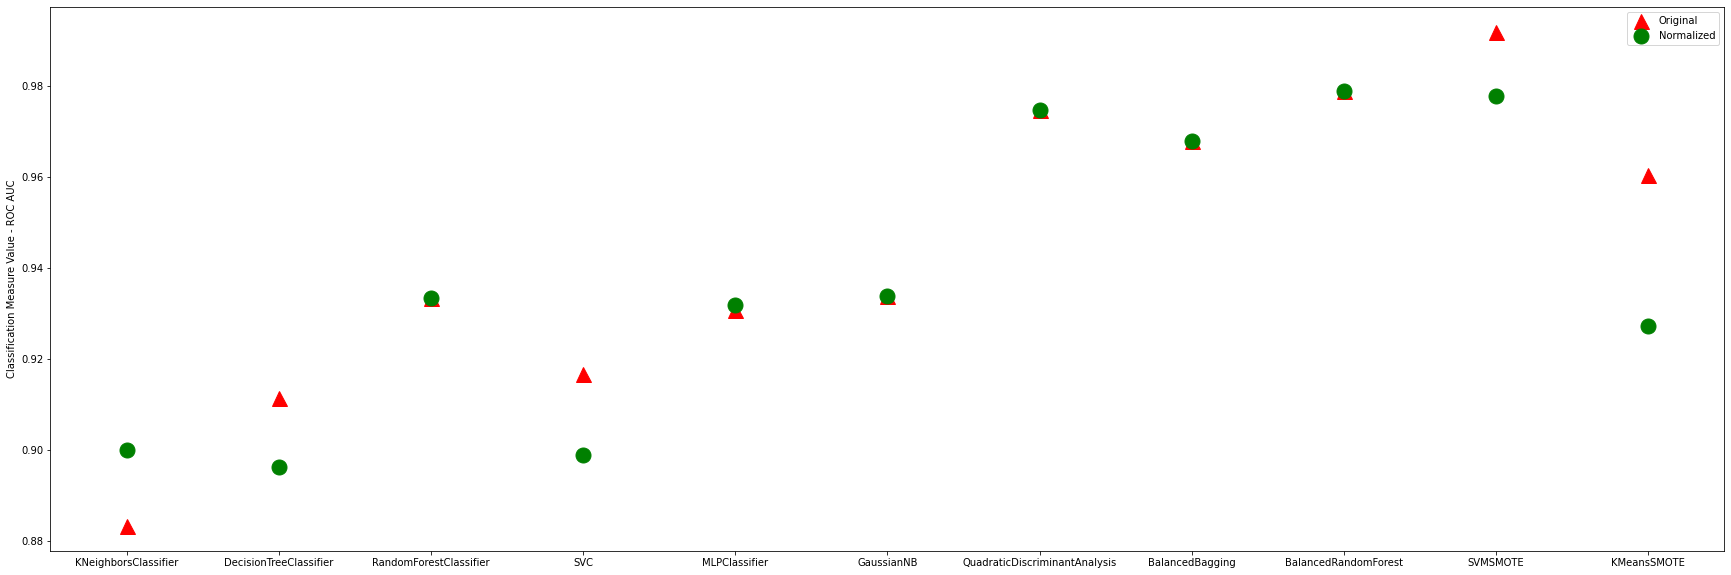

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(labels, np.array(original)[:,2], 'r^', labels, np.array(normalized)[:,2], 'go',markersize=15)
plt.ylabel('Classification Measure Value - ROC AUC')
plt.legend(['Original', 'Normalized'])
plt.show()

## Zadanie 6 

In [ ]:
# najbardziej obiecujący + dostrojenie params
from sklearn.model_selection import GridSearchCV

X, y = data[:,:-1], data[:,-1]
scoring = {'score': make_scorer(accuracy_score), 
           'gmean': make_scorer(geometric_mean_score), 
           'roc_auc_score': make_scorer(roc_auc_score)
           }
params = {
    'n_estimators': [1, 10, 100, 500, 1000], 
    'max_depth': [1, 5, 10, 20, 100], 
    'criterion': ["gini", "entropy"]
    }

random_forest_clf = RandomForestClassifier()
grid = GridSearchCV(random_forest_clf, param_grid=params, scoring=scoring, verbose=2, cv=10, refit='score')

grid.fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......criterion=gini, max_depth=1, n

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 20, 100],
                         'n_estimators': [1, 10, 100, 500, 1000]},
             refit='score',
             scoring={'gmean': make_scorer(geometric_mean_score),
                      'roc_auc_score': make_scorer(roc_auc_score),
                      'score': make_scorer(accuracy_score)},
             verbose=2)

#### Dodatkowo sprawdzenie poprawienia innej miary

In [ ]:
# najbardziej obiecujący + dostrojenie params
from sklearn.model_selection import GridSearchCV

X, y = data[:,:-1], data[:,-1]
scoring = {'score': make_scorer(accuracy_score), 
           'gmean': make_scorer(geometric_mean_score), 
           'roc_auc_score': make_scorer(roc_auc_score)
           }
params = {
    'n_estimators': [1, 10, 100, 500, 1000], 
    'max_depth': [1, 5, 10, 20, 100], 
    'criterion': ["gini", "entropy"]
    }

random_forest_clf = RandomForestClassifier()
grid = GridSearchCV(random_forest_clf, param_grid=params, scoring=scoring, verbose=2, cv=10, refit='gmean')

grid.fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ........criterion=gini, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.1s
[CV] END .......criterion=gini, max_depth=1, n

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 20, 100],
                         'n_estimators': [1, 10, 100, 500, 1000]},
             refit='gmean',
             scoring={'gmean': make_scorer(geometric_mean_score),
                      'roc_auc_score': make_scorer(roc_auc_score),
                      'score': make_scorer(accuracy_score)},
             verbose=2)

#### Powrót do poprzedniego 

In [ ]:
grid.best_params_ 

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [ ]:
random_forest_clf = RandomForestClassifier(
    criterion=grid.best_params_['criterion'], 
    max_depth=grid.best_params_['max_depth'],
    n_estimators=grid.best_params_['n_estimators']
    )

random_forest_clf.fit(X, y)

cv_results = cross_validate(random_forest_clf, X, y, cv=10, scoring=scoring)
print('Score:', max(cv_results['test_score']))
print('Gmean:', max(cv_results['test_gmean']))
print('ROC AUC:', max(cv_results['test_roc_auc_score']))

Score: 0.997
Gmean: 0.9650952982518897
ROC AUC: 0.9656357388316151


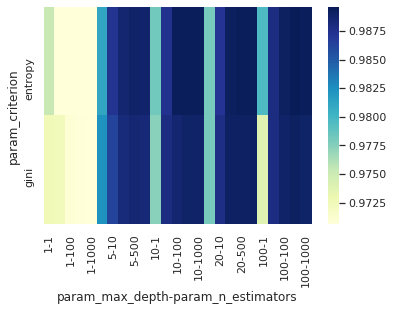

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_criterion', columns=['param_max_depth', 'param_n_estimators'])

sns.set(style = "darkgrid")
ax = sns.heatmap(pvt, cmap="YlGnBu")

## Zadanie 7

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X, y = data[:,:-1], data[:,-1]

model = LogisticRegression()

rfe = RFE(model, 3)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
[73  9 47 41 42 23 63 35  4 40 54 50 51 37 43 49 46  1 44 22  6 74 31 14
  3  1  1 70 29 48 55 11 32 13  8 30 52 69 66 17 68 45 39 62 57 53 64 67
 65 75 12 38 15  7 24 59 26 18  5  2 28 72 71 16 61 21 34 58 19 33 10 20
 56 25 27 60 36]


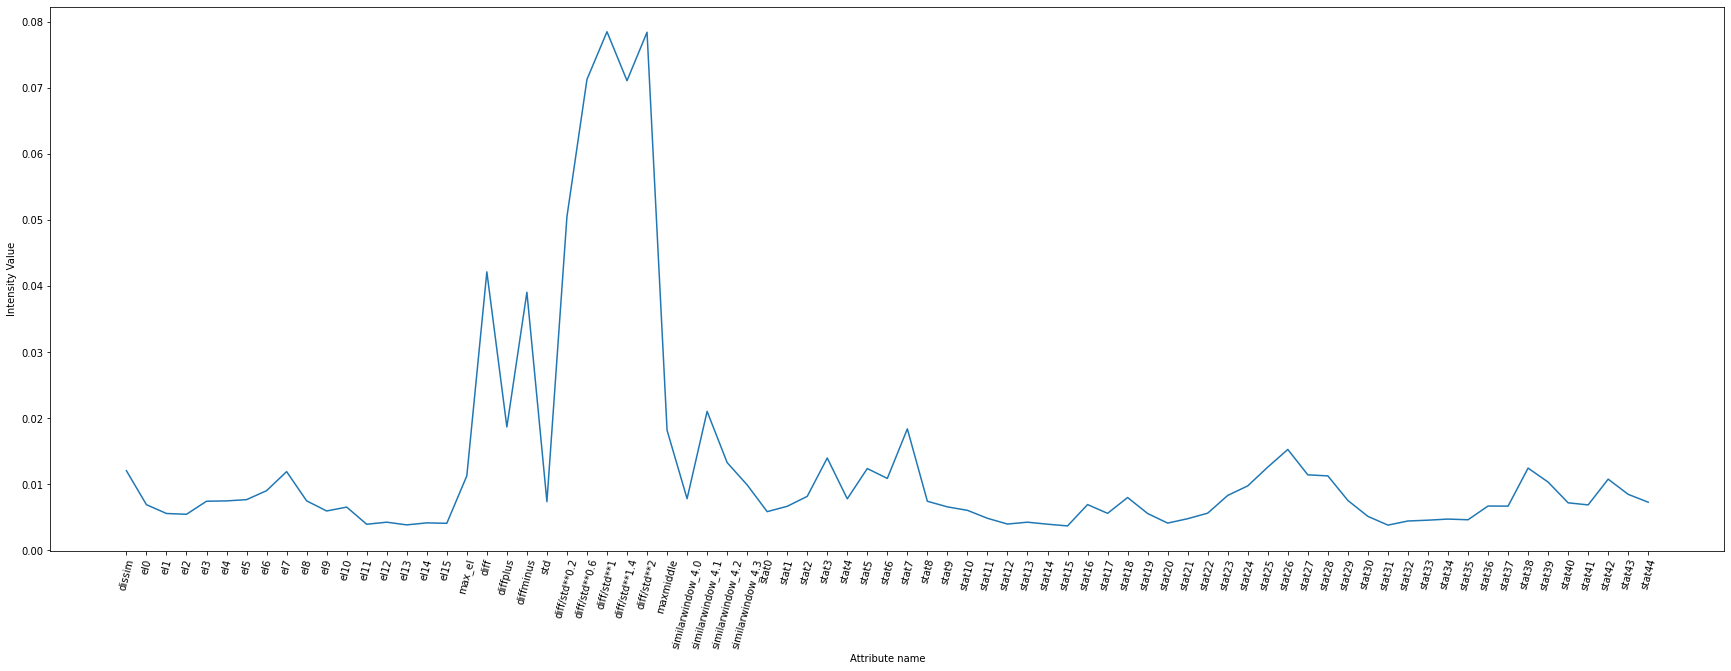

In [ ]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

with open("136737-imbalanced.txt") as f:
    lines = f.readlines()
    data_labels = lines[0].split()

X, y = data[:,:-1], data[:,-1]

model = ExtraTreesClassifier()
model.fit(X, y)

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(data_labels[:-1], model.feature_importances_)
ax.set_xticklabels(data_labels[:-1], rotation=75)
ax.set_xlabel("Attribute name")
ax.set_ylabel("Intensity Value")

plt.show()

## Zadanie 8

### Balanced

Text(0.5, 1.0, 'Balanced')

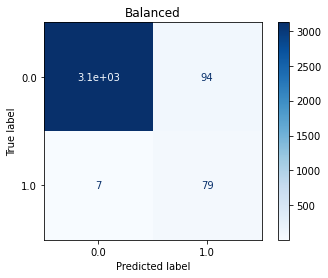

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X, y = data[:,:-1], data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33, random_state=42)
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Balanced")

### Second parametr - same weight

Text(0.5, 1.0, 'Dict: {0: 0.5, 1:0.5}')

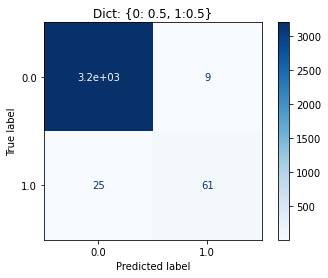

In [ ]:
from sklearn.metrics import plot_confusion_matrix

X, y = data[:,:-1], data[:,-1]
clf = SVC(class_weight={0: 0.5, 1:0.5})
clf.fit(X_train, y_train)

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Dict: {0: 0.5, 1:0.5}")

### Third parametr

Text(0.5, 1.0, 'Dict: {0: 0.25, 1:0.75}')

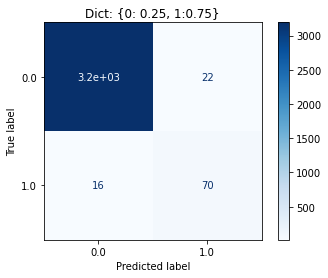

In [ ]:
from sklearn.metrics import plot_confusion_matrix

X, y = data[:,:-1], data[:,-1]
clf = SVC(class_weight={0: 0.25, 1:0.75})
clf.fit(X_train, y_train)

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Dict: {0: 0.25, 1:0.75}")

### Fourth parametr

Text(0.5, 1.0, 'Dict: {0: 0.005, 1:1.5}')

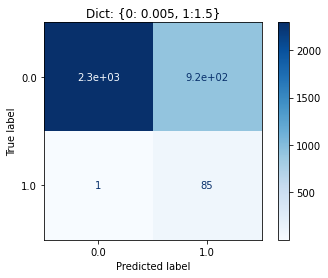

In [ ]:
from sklearn.metrics import plot_confusion_matrix

X, y = data[:,:-1], data[:,-1]
clf = SVC(class_weight={0: 0.005, 1:1.5})
clf.fit(X_train, y_train)

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Dict: {0: 0.005, 1:1.5}")

### Fifth parametr

Text(0.5, 1.0, 'Dict: {0: 1, 1:10}')

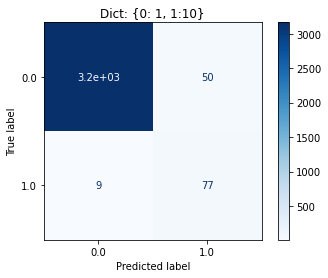

In [ ]:
from sklearn.metrics import plot_confusion_matrix

X, y = data[:,:-1], data[:,-1]
clf = SVC(class_weight={0: 1, 1:10})
clf.fit(X_train, y_train)

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Dict: {0: 1, 1:10}")

## Zadanie 9

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'MLP - Normalized')

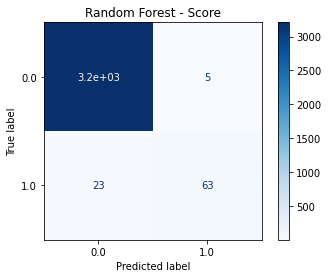

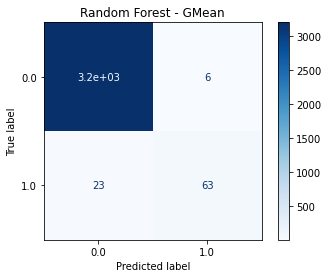

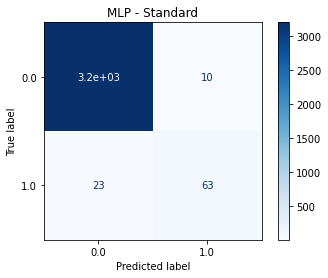

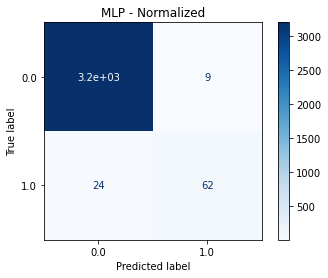

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scalar = StandardScaler()
random_forest_clf = RandomForestClassifier(
    criterion='entropy', 
    max_depth=20,
    n_estimators=500
    )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
random_forest_clf.fit(X_train, y_train)

disp = plot_confusion_matrix(random_forest_clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Random Forest - Score")


# RANDOM FOREST - GMEAN
random_forest_clf = RandomForestClassifier(
    criterion='entropy', 
    max_depth=10,
    n_estimators=100
    )

random_forest_clf.fit(X_train, y_train)

disp = plot_confusion_matrix(random_forest_clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Random Forest - GMean")

# MLP CLASIFFIER
mlp_clf = MLPClassifier()

mlp_clf.fit(X_train, y_train)

disp = plot_confusion_matrix(mlp_clf, X_test, y_test, cmap='Blues')
disp.ax_.set_title("MLP - Standard")


# MLP CLASIFFIER - NORMALIZED
mlp_clf_norm = MLPClassifier()

pipeline = Pipeline([('transformer', scalar), ('estimator', mlp_clf_norm)])
pipeline.fit(X_train, y_train)

disp = plot_confusion_matrix(pipeline, X_test, y_test, cmap='Blues')
disp.ax_.set_title("MLP - Normalized")

In [ ]:
from sklearn.model_selection import cross_val_score

print("ODCHYLENIA STANDARDOWE")
clf = RandomForestClassifier()
clf.fit(X, y)

cv_results = cross_val_score(clf, X, y, cv=10)
print('RandomForestClassifier', cv_results.std() * 100, '%')

clf = SVC()
clf.fit(X, y)

cv_results = cross_val_score(clf, X, y, cv=10)
print('SVC', cv_results.std() * 100, '%')

ODCHYLENIA STANDARDOWE
RandomForestClassifier 0.4317406628984584 %
SVC 0.38781438859330664 %
